# Transporte en Chicago: 

# Análisis para la inmersión de Zuber en el mercado

En el presente análisis se trabajará con cuatro tablas extraídas de páginas web externas y se formarán tres bases de datos a partir de dicha información; esto para encontrar patrones y permitir a Zuber, una nueva empresa de viajes compartidos, los datos necesarios para lanzar su servicio en Chicago.

En el análisis se podrán encontrar las preferencias de los pasajeros y el impacto de los factores externos en los viajes.


In [1]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math
import datetime
from datetime import date
import calendar

In [2]:
#Data Frame 1 contiene: company_name y trips_amount.
#Data Frame 2 contiene: dropoff_location_name y average_trips.
#Data Frame 3 contiene: start_ts, weather_conditions y duration_seconds.

df_1 = pd.read_csv('moved_project_sql_result_01.csv')

df_2 = pd.read_csv('moved_project_sql_result_04.csv')

df_3 = pd.read_csv('moved_project_sql_result_07.csv')

### Revisión de los data frames 1 y 2:

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Se puede observar un data frame con solo dos columnas y 64 líneas, en un primer momento parece que todos los datos están completos y los tipos de datos son adecuados en cada columna. 

In [5]:
print(df_1.duplicated().sum())

0


Además, no existen valores duplicados en el data frame. 

In [6]:
df_1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
df_2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [9]:
print(df_2.duplicated().sum())

0


In [10]:
df_2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Al igual que con el data frame 1, el 2 cuenta con dos columnas, ambas con tipos de datos correctos, cero valores ausentes o duplicados. 

## Los 10 principales barrios en términos de finalización del recorrido

In [11]:
top_10_dropoffs = df_2.sort_values(by = 'average_trips', ascending = False).head(10)

top_10_dropoffs

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


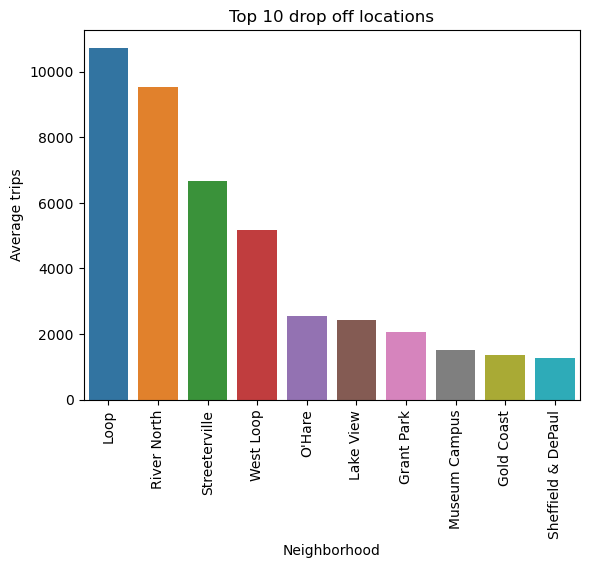

In [12]:
sns.barplot(data = top_10_dropoffs, x = 'dropoff_location_name', y = 'average_trips')

plt.title('Top 10 drop off locations')
plt.xlabel('Neighborhood')
plt.ylabel('Average trips')
plt.xticks(rotation = 90)
plt.show()

La gráfica de los destinos más comunes nos permite ver un gran salto entre el top 4 y el resto de destinos, algo similar ocurre con los dos principales destinos, donde vemos números que superan al siguiente por casi dos mil viajes en promedio. 

Tanto la tabla como la gráfica evidencian que el barrio más frecuentado como destino final es el Loop, seguido por River North y Streeterville.

## Las compañías de transporte con más viajes

In [13]:
top_10_companies = df_1.sort_values(by = 'trips_amount', ascending = False).head(10)

top_10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


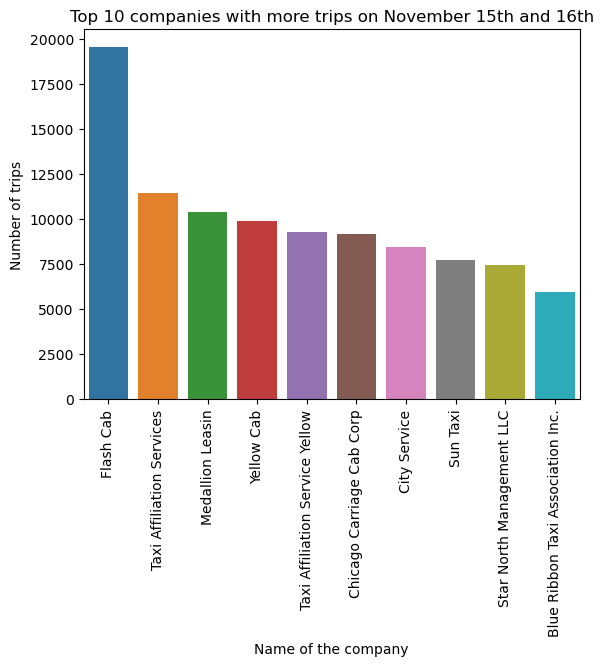

In [14]:
sns.barplot(data = top_10_companies, x = 'company_name', y = 'trips_amount')

plt.title('Top 10 companies with more trips on November 15th and 16th')
plt.xlabel('Name of the company')
plt.ylabel('Number of trips')
plt.xticks(rotation = 90)
plt.show()

La gráfica de las 10 compañías con más viajes evidencia claramente como Flash Cab es la compañía con más viajes durante las fechas señaladas, superando al segundo lugar, Taxi Affiliation Services, con más de 8000 viajes. 

Dejando de lado el número uno, el resto de compañías están mucho más parejas en cuanto a número de viajes, superando a la posición inmediatamente anterior por menos de mil viajes; exceptuando a Blue Ribbon Taxi Association Inc, la última compañía en el ranking, la cual tiene poco más de 1500 viajes menos que Star North Management LLC.

### Revisión del data frame 3:

In [15]:
df_3.info()
print()
print(df_1.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

0


In [16]:
df_3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [17]:
df_3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Tras una revisión rápida del data frame 3 podemos ver que no hay valores ausentes ni duplicados, sin embargo, la columna de 'start_ts' no está en el tipo adecuando, ya que se trata de una fecha y su tipo actual es 'object'.

Además, evaluando la prueba de hipótesis, se agregará una nueva columna donde se extraiga el día de la semana en la que se hizo cada viaje y así facilitar el análisis. 

In [18]:
df_3['start_ts'] = pd.to_datetime(df_3['start_ts'], format='%Y-%m-%d %H:%M:%S')

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [19]:
df_3['day_of_week'] = df_3['start_ts'].dt.weekday

df_3.sample(5)

,start_ts,weather_conditions,duration_seconds,day_of_week
211,2017-11-18 14:00:00,Good,3660.0,5
127,2017-11-11 07:00:00,Good,1320.0,5
239,2017-11-18 08:00:00,Bad,1404.0,5
745,2017-11-18 08:00:00,Bad,1332.0,5
690,2017-11-25 17:00:00,Good,2700.0,5


In [20]:
#Aquí se quería comprobar si existían valores en el data frame para días que no fueran sábado (sábado = 5). 

df_3[df_3['day_of_week'] != 5]

,start_ts,weather_conditions,duration_seconds,day_of_week


## Pruebas de hipótesis

H0 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados, sin importar si llueve. 

H1 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

- Se usará el nivel de significancia estándar de  𝑎𝑙𝑝ℎ𝑎  de 0.05.

- Se compararán dos categorías con respecto a una variable numérica ('duration seconds'), aquí se desconocen las desviaciones estándar, es por ello que para probar las hipótesis se usará el ttest.

In [21]:
#Agrupación de los viajes según las condiciones dadas

loop_ohare_sunny_sat = df_3.query("weather_conditions != 'Bad'")['duration_seconds']

loop_ohare_rainy_sat = df_3.query("weather_conditions == 'Bad'")['duration_seconds']

In [22]:
#Prueba de hipótesis

alpha = 0.05

results = st.ttest_ind(loop_ohare_sunny_sat, loop_ohare_rainy_sat) 

print(f"""
    La duración promedio en seg. de los viajes Loop / O'Hare los sábados que no llueve es: {loop_ohare_sunny_sat.mean().round(2)}
    La duración promedio en seg. de los viajes Loop / O'Hare los sábados lluviosos es: {loop_ohare_rainy_sat.mean().round(2)}
    
    p-value: {results.pvalue}
""")

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


    La duración promedio en seg. de los viajes Loop / O'Hare los sábados que no llueve es: 1999.68
    La duración promedio en seg. de los viajes Loop / O'Hare los sábados lluviosos es: 2427.21
    
    p-value: 6.517970327099473e-12

Rechazamos la hipótesis nula


Los resultados de la prueba de hipótesis arrojaron que debemos rechazar la hipótesis nula, es decir, la duración promedio de los viajes desde Loop y el Aeropuerto internacional O'Hare los sábados no es igual en cualquier condición climática. 

Los datos parecen indicar que la duración de los viajes sí se ve alterada dependiendo de las condiciones climáticas. 

## Conclusiones finales

### Recopilación de las conclusiones a lo largo del análisis: 

- Los dos principales destinos superan por más de dos mil viajes al resto de los destinos, estos son Loop y River North. 

- El top 10 de destinos para terminar los viajes son: 
    1. Loop
    2. River North
    3. Streeterville
    4. West Loop
    5. O'Hare
    6. Lake View
    7. Grant Park
    8. Museum Campus
    9. Gold Coast
    10. Sheffield & DePaul
    
 
 
- La gráfica de las 10 compañías con más viajes evidencia claramente como Flash Cab es la compañía con utilizada, superando al segundo lugar, Taxi Affiliation Services, con más de 8000 viajes. 

- Las 10 plataformas de viajes más usadas en Chicago son: 
    1. Flash Cab
    2. Taxi Affiliation Services
    3. Medallion Leasin
    4. Yellow Cab
    5. Taxi Affiliation Service Yellow
    6. Chicago Carriage Cab Corp
    7. City Service
    8. Sun Taxi
    9. Star North Management LLC
    10. Blue Ribbon Taxi Association Inc.
    


- Tras una prueba de hipótesis donde se evaluó si las condiciones climáticas podían afectar la duración de los viajes desde Loop hasta el Aeropuerto Internaciona O'Hare de Chicago determinó que: 
    - La duración promedio de los viajes desde Loop y el Aeropuerto internacional O'Hare los sábados no es igual en cualquier condición climática. 

    - Los datos parecen indicar que la duración de los viajes sí se ve alterada dependiendo de las condiciones climáticas. 
    
### Conclusiones finales

Para llevar acabo la inmersión de Zuber en Chicago, como nuevo servicio de viajes compartidos, se recomienda lo siguiente: 

- Cubrir las zonas más demandadas y quizá hacer descuentos, generando tarifas competitivas que lleven al usuario hasta las zonas más comúnmente usadas como destino final en la ciudad. 

- Dar una mayor cobertura en momentos donde el clima es lluvioso, si bien los datos no son determinantes, podemos ver una variación en el comportamiento de los usuarios durante estos eventos climáticos, en importante cubrir las necedidades de los pasajeros para que estos prefieran Zuber sobre cualquier otro servicio que ya lleva años en el mercado. 